In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import BaggingClassifier

In [63]:
df = pd.read_csv(r"C:\Users\gg787\ADP_데싸라면\adp_데이터모음\data\credit_final.csv")

In [61]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [65]:
df["credit.rating"].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [10]:
feature = df.drop("credit.rating", axis = 1)
label = df["credit.rating"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 2021)

bag = BaggingClassifier(random_state = 2021, n_estimators= 100)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_pred_proba = bag.predict_proba(X_test)[:,1]
print("학습 데이터 성능 : {}".format(bag.score(X_train, y_train)))
print("테스트 데이터 성능 : {}".format(bag.score(X_test, y_test)))
print("ROC_AUC_SCORE : {}".format(roc_auc_score(y_test, bag_pred_proba)))
print("f1_score : {}".format(f1_score(y_test, bag_pred)))

학습 데이터 성능 : 1.0
테스트 데이터 성능 : 0.7533333333333333
ROC_AUC_SCORE : 0.802276496306347
f1_score : 0.8271028037383178


C:\Users\gg787\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


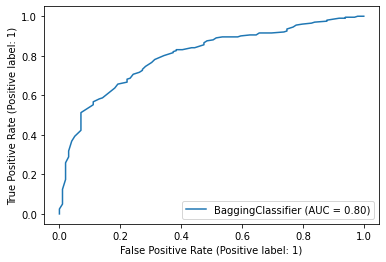

In [34]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(bag, X_test, y_test)

oob_score

In [37]:
clf = BaggingClassifier(oob_score= True, n_estimators= 100, max_samples=1.0,\
                       max_features = 1.0)

clf.fit(feature, label)
clf.oob_score_

0.764

In [59]:
# 변수의 중요도 확인

import_mean = []

for tree in clf.estimators_:
    feature_list = tree.feature_importances_
    import_mean.append(feature_list)
    mean_list = np.mean(import_mean, axis = 0)

    
mean_list_df = pd.DataFrame(mean_list, columns = ["feature_importance"])
col_df = pd.DataFrame(data = X_train.columns, columns = ["col_names"])
important_df = pd.concat([col_df, mean_list_df], axis = 1)
sort_importance = important_df.sort_values(by = "feature_importance", ascending= False)
sort_importance

,col_names,feature_importance
4,credit.amount,0.178588
0,account.balance,0.131393
12,age,0.115318
1,credit.duration.months,0.112735
3,credit.purpose,0.047134
11,current.assets,0.046980
2,previous.credit.payment.status,0.045206
5,savings,0.044930
6,employment.duration,0.042330
10,residence.duration,0.039889


<AxesSubplot:xlabel='feature_importance', ylabel='col_names'>

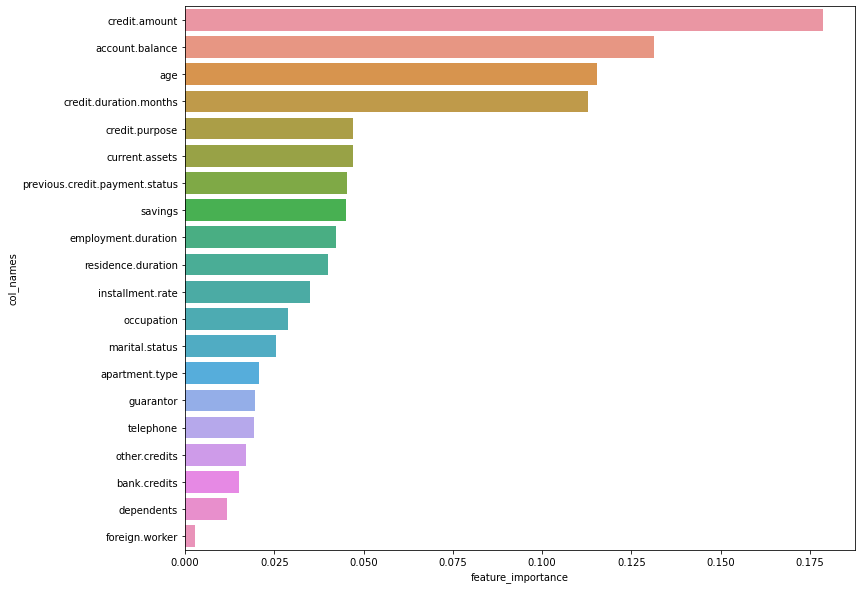

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
sns.barplot(x = "feature_importance", y= "col_names", data = sort_importance)